In [374]:
import pandas as pd

In [375]:
diabetes_overfit = pd.read_csv("diabetes.csv")

In [376]:
diabetes_overfit.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [377]:
diabetes_overfit.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [378]:
diabetes_overfit['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [379]:
diabetes_overfit.drop('smoking_history', axis=1, inplace=True)


In [380]:
diabetes_overfit.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


Encode The Gender

In [381]:
diabetes_overfit['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [382]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [383]:
diabetes_overfit = diabetes_overfit[diabetes_overfit['gender'] != 'Other']

In [384]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
dtype: int64

In [385]:
diabetes_overfit.groupby('diabetes').size()

diabetes
0    91482
1     8500
dtype: int64

In [386]:
class_1 = diabetes_overfit[diabetes_overfit['diabetes'] == 1]
class_0 = diabetes_overfit[diabetes_overfit['diabetes'] == 0].sample(n=8500, random_state=42)
diabetes = pd.concat([class_0, class_1])
diabetes.groupby('diabetes').size()


diabetes
0    8500
1    8500
dtype: int64

In [387]:
# diabetes=diabetes_overfit

In [388]:
# diabetes['gender'].replace(['Female','Male'],[0,1],inplace = True)

In [389]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
diabetes['gender'] = lable_encoder.fit_transform(diabetes['gender'])
diabetes['gender'].unique()

array([0, 1])

In [390]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
50974,0,80.0,0,0,27.32,6.1,159,0
62503,1,15.0,0,0,19.89,6.6,159,0
306,0,80.0,0,1,21.30,5.0,159,0
86797,0,25.0,0,0,27.32,4.0,130,0
3762,1,17.0,0,0,27.24,6.2,160,0


<Axes: >

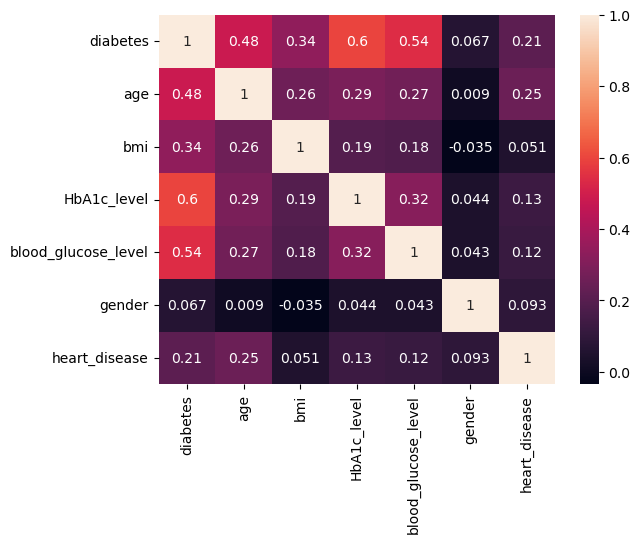

In [391]:
import seaborn as sns

sns.heatmap(diabetes[['diabetes','age','bmi','HbA1c_level','blood_glucose_level','gender','heart_disease']].corr(),annot = True)

In [392]:
# sns.boxplot(diabetes)

In [ ]:
import numpy as np


bmi_values = diabetes['bmi']


Q1 = np.percentile(bmi_values, 25)
Q3 = np.percentile(bmi_values, 75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_count = sum((bmi_values < lower_bound) | (bmi_values > upper_bound))

print("Number of outliers in BMI feature:", outliers_count)


Number of outliers in BMI feature: 1041


In [394]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 50974 to 99979
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  int32  
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   bmi                  17000 non-null  float64
 5   HbA1c_level          17000 non-null  float64
 6   blood_glucose_level  17000 non-null  int64  
 7   diabetes             17000 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.1 MB


Imputing Outliers

In [ ]:
import numpy as np


Q1 = np.percentile(diabetes['bmi'], 25)
Q3 = np.percentile(diabetes['bmi'], 75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


diabetes_cleaned = diabetes[(diabetes['bmi'] >= lower_bound) & (diabetes['bmi'] <= upper_bound)]
load_diabetes=diabetes_cleaned.copy()

print("Shape of original DataFrame:", diabetes.shape)
print("Shape of cleaned DataFrame:", diabetes_cleaned.shape)


Shape of original DataFrame: (17000, 8)
Shape of cleaned DataFrame: (15959, 8)


<Axes: >

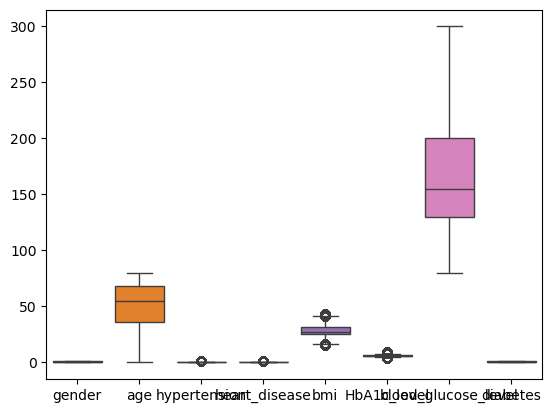

In [396]:
sns.boxplot(diabetes_cleaned)

In [397]:
X = diabetes_cleaned.drop(['diabetes'], axis = 1)
y = diabetes_cleaned['diabetes']

In [398]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
50974,0,80.0,0,0,27.32,6.1,159
62503,1,15.0,0,0,19.89,6.6,159
306,0,80.0,0,1,21.30,5.0,159
86797,0,25.0,0,0,27.32,4.0,130
3762,1,17.0,0,0,27.24,6.2,160


In [399]:
y.head()

50974    0
62503    0
306      0
86797    0
3762     0
Name: diabetes, dtype: int64

In [400]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=42)

In [401]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [402]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
deepneuralnetworks_model = tf.keras.models.Sequential()
deepneuralnetworks_model.add(tf.keras.layers.Dense(units = 7, activation = 'relu')) 
deepneuralnetworks_model.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
deepneuralnetworks_model.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
deepneuralnetworks_model.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
deepneuralnetworks_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
deepneuralnetworks_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = deepneuralnetworks_model.fit(X_train, y_train, epochs=100, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
399/399 [==============================] - 2s 2ms/step - loss: 0.5146 - accuracy: 0.7768 - val_loss: 0.3558 - val_accuracy: 0.8672
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8768 - val_loss: 0.2770 - val_accuracy: 0.8775
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.8804 - val_loss: 0.2621 - val_accuracy: 0.8778
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.8791 - val_loss: 0.2580 - val_accuracy: 0.8772
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2481 - accuracy: 0.8820 - val_loss: 0.2508 - val_accuracy: 0.8810
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.8839 - val_loss: 0.2462 - val_accuracy: 0.8813
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.8863 - val_loss: 0.2440 - val_accuracy: 0.8813

In [403]:
predict = deepneuralnetworks_model.predict(X_test)

100/100 [==============================] - 0s 801us/step


In [ ]:


import pandas as pd


gender_convert = 0 
age = 20.0
hypertension_convert = 0 
heart_disease_convert = 0 
bmi = 35.0
HbA1c_level = 7.5
blood_glucose_level = 160.0


input_data = pd.DataFrame([[gender_convert, age, hypertension_convert, heart_disease_convert, bmi, HbA1c_level, blood_glucose_level]],
                          columns=['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'])


standardized_input = stand.transform(input_data)


prediction = deepneuralnetworks_model.predict(standardized_input)


probability = prediction[0].item()
if probability > 0.5:
    risk_level = "High Risk"
else:
    risk_level = "Low Risk"


print(f"Risk Level: {risk_level}")
print(f"The probability of having diabetes is: {probability * 100:.2f} Percent")
print(f"The probability of not having diabetes is: {(1 - probability) * 100:.2f} Percent")

1/1 [==============================] - 0s 86ms/step
Risk Level: High Risk
The probability of having diabetes is: 99.77 Percent
The probability of not having diabetes is: 0.23 Percent


In [405]:
print(predict)

[[9.9996495e-01]
 [4.1101154e-07]
 [8.0394790e-07]
 ...
 [5.1714224e-01]
 [8.1194878e-01]
 [1.9781127e-07]]


In [ ]:
import pickle



data = {"deepneuralnetworks_model": deepneuralnetworks_model,"lable_encoder": lable_encoder }
with open('linear_regression_model3.pkl','wb') as file:
    pickle.dump(data,file)

INFO:tensorflow:Assets written to: ram://22f67846-a2ba-461c-b622-32fe07e310b2/assets


In [407]:
import joblib
joblib.dump(deepneuralnetworks_model,'deepneuralnetworks_model.pkl')
joblib.dump(stand,'standard_scaler.pkl')
joblib.dump(load_diabetes,'load_diabetes.pkl')

INFO:tensorflow:Assets written to: ram://483ee94a-98ba-457b-aa96-aca8152d70a0/assets


['load_diabetes.pkl']

In [408]:
import tensorflow as tf
path = './model.h5'
deepneuralnetworks_model.save(path )
loaded_model= tf.keras.models.load_model(path )
